In [1]:
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot
import pandas as pd
import statsmodels as sm
import statsmodels.api 
import statsmodels.stats.api
from scipy import stats
from scipy.stats import norm
from scipy.stats import boxcox
from pylab import *

In [2]:
# read in data
customers = pd.read_excel('Data/Telco.xlsx')

In [3]:
customers.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
# find out how many columns there, are since not all are displayed with the ".head()" function.
len(customers.columns)

33

In [5]:
customers["State"].unique()

array(['California'], dtype=object)

In [6]:
customers.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [7]:
telco = customers.drop(["CustomerID", "Count", "Lat Long", "Latitude", "Longitude", "Country", "State", "Partner", "Dependents", "Streaming TV", "Streaming Movies", "Paperless Billing", "Churn Label", "Churn Value"], axis=1)

In [8]:
telco.columns

Index(['City', 'Zip Code', 'Gender', 'Senior Citizen', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Contract', 'Payment Method', 'Monthly Charges', 'Total Charges',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [9]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Contract           7043 non-null   object 
 13  Payment Method     7043 non-null   object 
 14  Monthly Charges    7043 non-null   float64
 15  Total Charges      7043 non-null   object 
 16  Churn Score        7043 

In [10]:
telco["Contract"].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [11]:
def contractR (series):
    if series == "Month-to-month":
        return 0
    if series == "One year":
        return 1
    if series == "Two year":
        return 2
telco["contractR"] = telco["Contract"].apply(contractR)

In [12]:
telco.head()

,City,Zip Code,Gender,Senior Citizen,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,Churn Reason,contractR
0,Los Angeles,90003,Male,No,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,86,3239,Competitor made better offer,0
1,Los Angeles,90005,Female,No,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,67,2701,Moved,0
2,Los Angeles,90006,Female,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Electronic check,99.65,820.5,86,5372,Moved,0
3,Los Angeles,90010,Female,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Electronic check,104.80,3046.05,84,5003,Moved,0
4,Los Angeles,90015,Male,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Bank transfer (automatic),103.70,5036.3,89,5340,Competitor had better devices,0


In [13]:
# predictor variables: senior citizen, monthly charges, payment method, contractR

In [14]:
telco["Senior Citizen"].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
telco["Payment Method"].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [16]:
def seniorCitizenR (series):
    if series == "No":
        return 0
    if series == "Yes":
        return 1
telco["Senior_CitizenR"] = telco["Senior Citizen"].apply(seniorCitizenR)

In [17]:
def paymentR (series):
    if series == "Credit card (automatic)":
        return 0
    if series == "Mailed check":
        return 1
    if series == "Bank transfer (automatic)":
        return 2
    if series == "Electronic check":
        return 3
telco["Payment_MethodR"] = telco["Payment Method"].apply(paymentR)

In [18]:
telco.head()

,City,Zip Code,Gender,Senior Citizen,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,Churn Reason,contractR,Senior_CitizenR,Payment_MethodR
0,Los Angeles,90003,Male,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Mailed check,53.85,108.15,86,3239,Competitor made better offer,0,0,1
1,Los Angeles,90005,Female,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Electronic check,70.70,151.65,67,2701,Moved,0,0,3
2,Los Angeles,90006,Female,No,8,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Electronic check,99.65,820.5,86,5372,Moved,0,0,3
3,Los Angeles,90010,Female,No,28,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Electronic check,104.80,3046.05,84,5003,Moved,0,0,3
4,Los Angeles,90015,Male,No,49,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Bank transfer (automatic),103.70,5036.3,89,5340,Competitor had better devices,0,0,2


In [19]:
telco["Monthly Charges"] = telco["Monthly Charges"].astype(int)

In [20]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   City               7043 non-null   object
 1   Zip Code           7043 non-null   int64 
 2   Gender             7043 non-null   object
 3   Senior Citizen     7043 non-null   object
 4   Tenure Months      7043 non-null   int64 
 5   Phone Service      7043 non-null   object
 6   Multiple Lines     7043 non-null   object
 7   Internet Service   7043 non-null   object
 8   Online Security    7043 non-null   object
 9   Online Backup      7043 non-null   object
 10  Device Protection  7043 non-null   object
 11  Tech Support       7043 non-null   object
 12  Contract           7043 non-null   object
 13  Payment Method     7043 non-null   object
 14  Monthly Charges    7043 non-null   int32 
 15  Total Charges      7043 non-null   object
 16  Churn Score        7043 non-null   int64 


In [21]:
telco.head()

,City,Zip Code,Gender,Senior Citizen,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,Churn Reason,contractR,Senior_CitizenR,Payment_MethodR
0,Los Angeles,90003,Male,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Mailed check,53,108.15,86,3239,Competitor made better offer,0,0,1
1,Los Angeles,90005,Female,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Electronic check,70,151.65,67,2701,Moved,0,0,3
2,Los Angeles,90006,Female,No,8,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Electronic check,99,820.5,86,5372,Moved,0,0,3
3,Los Angeles,90010,Female,No,28,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Electronic check,104,3046.05,84,5003,Moved,0,0,3
4,Los Angeles,90015,Male,No,49,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Bank transfer (automatic),103,5036.3,89,5340,Competitor had better devices,0,0,2


In [22]:
def genderR (series):
    if series == "Male":
        return 0
    if series == "Female":
        return 1
telco["GenderR"] = telco["Gender"].apply(genderR)

In [23]:
# sns.pairplot()
telcoLM1 = telco.filter(["GenderR", "Senior_CitizenR", "Tenure Months", "Monthly Charges", "contractR", "Payment_MethodR", "Churn Score"], axis = 1)

In [24]:
telcoLM1.head()

,GenderR,Senior_CitizenR,Tenure Months,Monthly Charges,contractR,Payment_MethodR,Churn Score
0,0,0,2,53,0,1,86
1,1,0,2,70,0,3,67
2,1,0,8,99,0,3,86
3,1,0,28,104,0,3,84
4,0,0,49,103,0,2,89


In [37]:
telcoLM2 = telco.filter(["Tenure Months", "Monthly Charges", "Total Charges", "Churn Score"], axis=1)

In [38]:
telcoLM2.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Score
0,2,53,108.15,86
1,2,70,151.65,67
2,8,99,820.5,86
3,28,104,3046.05,84
4,49,103,5036.3,89


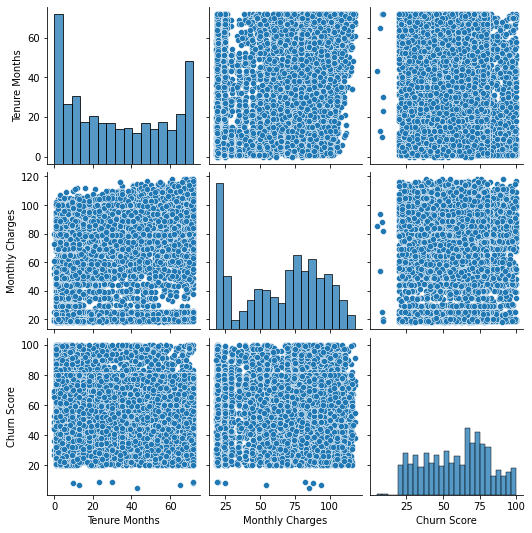

In [39]:
sns.pairplot(telcoLM2)

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly Charges', ylabel='Density'>

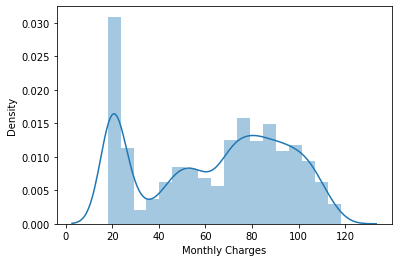

In [40]:
sns.distplot(telcoLM2['Monthly Charges'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly_ChargesSQRT', ylabel='Density'>

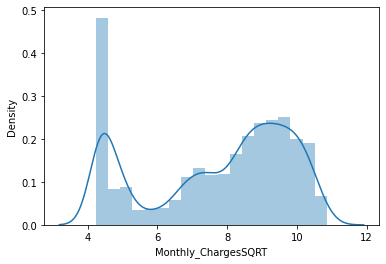

In [41]:
telcoLM2['Monthly_ChargesSQRT'] = np.sqrt(telcoLM2['Monthly Charges'])
sns.distplot(telcoLM2['Monthly_ChargesSQRT'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tenure Months', ylabel='Density'>

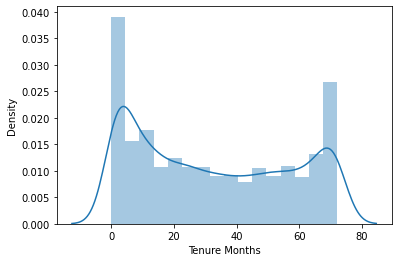

In [42]:
sns.distplot(telcoLM2['Tenure Months'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tenure_MonthsSQRT', ylabel='Density'>

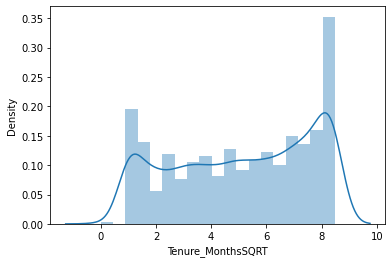

In [43]:
telcoLM2['Tenure_MonthsSQRT'] = np.sqrt(telcoLM2['Tenure Months'])
sns.distplot(telcoLM2['Tenure_MonthsSQRT'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tenure_MonthsSQ', ylabel='Density'>

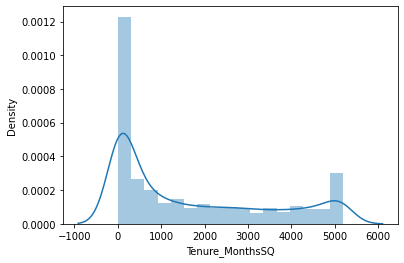

In [44]:
telcoLM2['Tenure_MonthsSQ'] = (telcoLM2['Tenure Months'])*(telcoLM2['Tenure Months'])
sns.distplot(telcoLM2['Tenure_MonthsSQ'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Churn Score', ylabel='Density'>

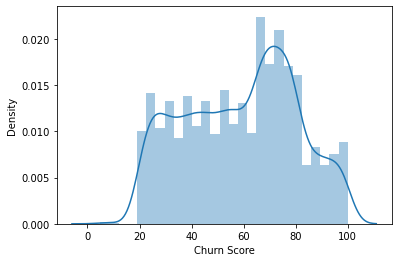

In [45]:
sns.distplot(telcoLM2['Churn Score'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ChurnScoreSQ', ylabel='Density'>

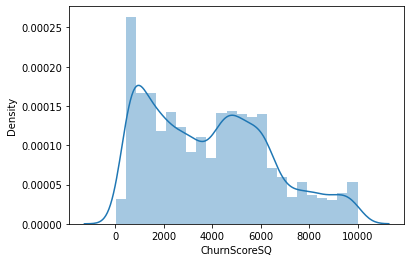

In [46]:
telcoLM2['ChurnScoreSQ'] = (telcoLM2['Churn Score'])*(telcoLM2['Churn Score'])
sns.distplot(telcoLM2['ChurnScoreSQ'])

In [49]:
telcoLM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tenure Months        7043 non-null   int64  
 1   Monthly Charges      7043 non-null   int32  
 2   Total Charges        7043 non-null   object 
 3   Churn Score          7043 non-null   int64  
 4   Monthly_ChargesSQRT  7043 non-null   float64
 5   Tenure_MonthsSQRT    7043 non-null   float64
 6   Tenure_MonthsSQ      7043 non-null   int64  
 7   ChurnScoreSQ         7043 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 412.8+ KB


In [52]:
telcoLM2["Total Charges"] = telcoLM2["Total Charges"].astype(float64)

ValueError: could not convert string to float: ''